In [1]:
import torch

In [54]:
w = torch.tensor([[2, 3, 4]], dtype=torch.float32,requires_grad=True)
b = torch.tensor([3], dtype=torch.float32,requires_grad=True)
x = torch.tensor([[5, 2, 1]], dtype=torch.float32)
y = torch.tensor([7], dtype=torch.float32)

In [3]:
loss = ((x @ w.T + b) - y)**2

In [12]:
loss.item()

256.0

In [4]:
loss.backward()

In [5]:
w.grad

tensor([[160.,  64.,  32.]])

In [6]:
b.grad

tensor([32.])

In [8]:
lr =0.1

In [9]:
w = w - lr * w.grad
b = b - lr * b.grad

In [10]:
w

tensor([[-14.0000,  -3.4000,   0.8000]], grad_fn=<SubBackward0>)

In [11]:
b

tensor([-0.2000], grad_fn=<SubBackward0>)

In [13]:
loss = ((x @ w.T + b) - y)**2

In [14]:
loss.item()

6922.2392578125

In [15]:
w.grad = None
b.grad = None

tensor([[-14.0000,  -3.4000,   0.8000]], grad_fn=<SubBackward0>)

In [55]:
import numpy as np
losses = []
grads = np.zeros((10,3))
for epoch in range(10):
    loss = ((x @ w.T + b) - y)**2
    loss.backward()
    losses.append(loss.item())
    with torch.no_grad():
        w -= 0.001 * w.grad
        b -= 0.001 * b.grad
    grads[epoch] = w.grad.numpy()
    w.grad.zero_()
    b.grad.zero_()
    

In [56]:
import matplotlib.pyplot as plt

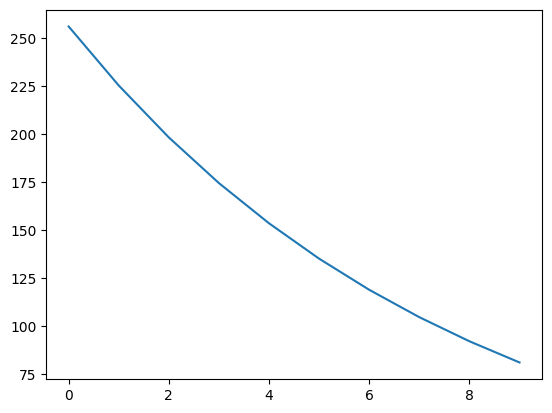

In [57]:
plt.plot(losses)

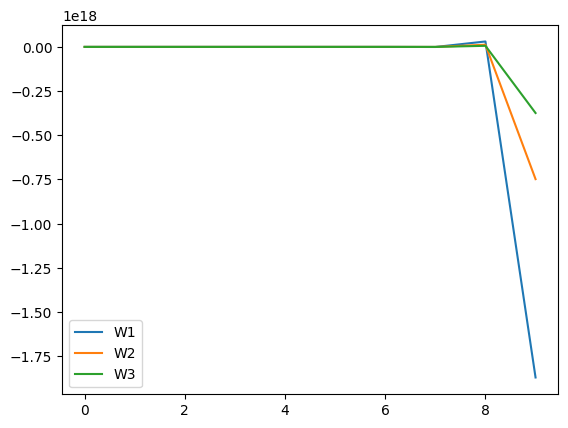

In [47]:
plt.plot(grads[:,0], label='W1')
plt.plot(grads[:,1], label='W2')
plt.plot(grads[:,2], label='W3')
plt.legend()
plt.show()

In [51]:
w = torch.tensor([[0.9901, 0.979, 0.981]], dtype=torch.float32,requires_grad=True)
b = torch.tensor([0.978], dtype=torch.float32,requires_grad=True)

In [52]:
import numpy as np
losses = []
grads = np.zeros((10,3))
for epoch in range(10):
    loss = ((x @ w.T + b) - y)**2
    loss.backward()
    losses.append(loss.item())
    with torch.no_grad():
        w -= 0.001 * w.grad
        b -= 0.001 * b.grad
    grads[epoch] = w.grad.numpy()
    w.grad.zero_()
    b.grad.zero_()


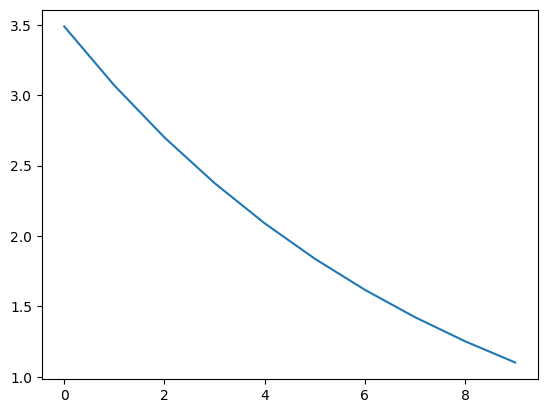

In [53]:
plt.plot(losses)

In [289]:
w1 = torch.rand((5,3), dtype=torch.float32,requires_grad=True)
w2 = torch.rand((1,5), dtype=torch.float32,requires_grad=True)
b1 = torch.zeros(5, dtype=torch.float32, requires_grad=True)
b2 = torch.zeros(1, dtype=torch.float32, requires_grad=True)
x = torch.rand((5,3))
y = torch.rand((5,1))

In [290]:
class SGD():
    def __init__(self, params, momentum, damp, learning_rate):
        self.params = params
        self.velocities = None
        self.lr = learning_rate
        self.momentum = momentum
        self.damp = damp
    def step(self):
        with torch.no_grad():
            if self.velocities is None:
                self.velocities = [param.grad for param in self.params]
            for n, param in enumerate(self.params):
                forward_velocity = self.momentum * self.velocities[n] + (1-self.damp)*param.grad
                self.params[n]-= self.lr * forward_velocity
                self.velocities[n] = forward_velocity
            
            
    def zero_grad(self):
        for n, param in enumerate(self.params):
            self.params[n].grad.zero_()

In [291]:
optimizer = SGD([w1,w2,b1,b2],0.90, 0.90, 0.01)

In [292]:
losses = []
for epoch in range(1000):  # Increased epochs for better convergence
    # Forward pass
    
    hidden = torch.nn.functional.relu(x @ w1.T + b1)
    output = hidden @ w2.T + b2
    loss = torch.mean((y - output)**2)

    # Backward pass
    
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")
    optimizer.zero_grad()
# Test the model
with torch.no_grad():
    hidden = torch.nn.functional.relu(x @ w1.T + b1)
    output = hidden @ w2.T + b2
    print("Predictions:")
    print(output)
    print("Actual:")
    print(y)

Epoch 0, Loss: 4.3635
Epoch 100, Loss: 0.0783
Epoch 200, Loss: 0.0567
Epoch 300, Loss: 0.0495
Epoch 400, Loss: 0.0459
Epoch 500, Loss: 0.0434
Epoch 600, Loss: 0.0413
Epoch 700, Loss: 0.0394
Epoch 800, Loss: 0.0377
Epoch 900, Loss: 0.0361
Predictions:
tensor([[0.8645],
        [0.5113],
        [0.3890],
        [0.4623],
        [0.6650]])
Actual:
tensor([[0.9226],
        [0.1906],
        [0.3356],
        [0.6980],
        [0.7586]])


In [305]:
w1 = torch.rand((5,3), dtype=torch.float32,requires_grad=True)
w2 = torch.rand((1,5), dtype=torch.float32,requires_grad=True)
b1 = torch.zeros(5, dtype=torch.float32, requires_grad=True)
b2 = torch.zeros(1, dtype=torch.float32, requires_grad=True)

In [306]:
optimizer = SGD([w1,w2,b1,b2],0.90, 0.90, 0.01)

In [307]:
losses = []
for epoch in range(1000):  # Increased epochs for better convergence
    # Forward pass
    running_loss = 0
    for n, X in enumerate(x):
        hidden = torch.nn.functional.relu(X @ w1.T + b1)
        output = hidden @ w2.T + b2
        loss = torch.mean((y[n] - output)**2)

        # Backward pass
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    losses.append(running_loss/x.shape[0])

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {running_loss/x.shape[0]:.4f}")
    
# Test the model
with torch.no_grad():
    hidden = torch.nn.functional.relu(x @ w1.T + b1)
    output = hidden @ w2.T + b2
    print("Predictions:")
    print(output)
    print("Actual:")
    print(y)

Epoch 0, Loss: 0.8954
Epoch 100, Loss: 0.0472
Epoch 200, Loss: 0.0403
Epoch 300, Loss: 0.0354
Epoch 400, Loss: 0.0320
Epoch 500, Loss: 0.0294
Epoch 600, Loss: 0.0269
Epoch 700, Loss: 0.0247
Epoch 800, Loss: 0.0227
Epoch 900, Loss: 0.0209
Predictions:
tensor([[0.8870],
        [0.3936],
        [0.3398],
        [0.4718],
        [0.8046]])
Actual:
tensor([[0.9226],
        [0.1906],
        [0.3356],
        [0.6980],
        [0.7586]])


In [263]:
w1

tensor([[-384.8205, -400.0002, -256.8898],
        [-495.4535, -515.1544, -329.7933],
        [ -13.3149,  -13.0495,   -8.3398],
        [-423.4078, -439.9409, -281.5709],
        [-153.3870, -158.7641, -101.9098],
        [-527.8328, -549.2864, -351.7047],
        [-189.8145, -198.0156, -126.5763],
        [-182.8955, -189.2435, -121.3567],
        [-111.2035, -115.4356,  -74.0019],
        [ -25.6607,  -25.9173,  -16.3964],
        [-493.8058, -513.6901, -328.8123],
        [-231.6112, -240.6143, -154.2263],
        [-602.4781, -627.0580, -401.3484],
        [-386.2272, -401.0171, -257.3687],
        [-100.2853, -104.2068,  -66.6247]], requires_grad=True)

In [240]:
y

tensor([[7.],
        [3.],
        [2.],
        [8.]])

In [241]:
output = torch.nn.functional.relu(x @ w1.T + b1) @ w2 + b2

In [242]:
output

tensor([[4.8168],
        [4.8168],
        [4.8168],
        [4.8168]], grad_fn=<AddBackward0>)

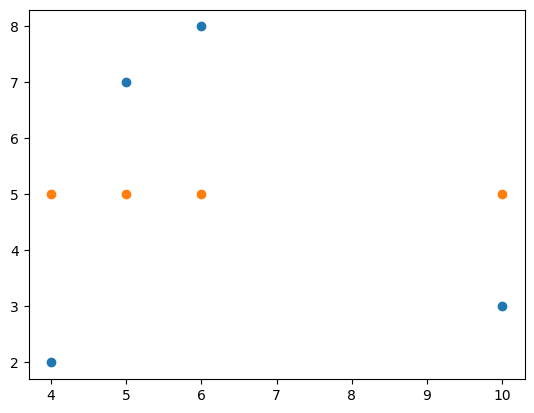

In [264]:
plt.scatter(x.numpy()[:,0], y)
plt.scatter(x.numpy()[:,0], output.detach().numpy())
plt.show()